# Content and Objective

+ Show boxplots and gaussian approximation

# Import

In [5]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [6]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters for Simulation

In [7]:
# points to be transmitted, modulating the bits to be transmitted
constellation_points = [ +1, -1 ]

# variance of the noise --> you may play with this parameter if you like to
Es_N0_dB = 3

Es_N0 = 10**( Es_N0_dB / 10. )

sigma2 = 1 / ( 2 * Es_N0 )


In [8]:
# (independent) simulations to be performed in order to get several realizations for creating boxplots

N_trials = int( 1e3 )

# number of constellation points transmitted in one trial
# NOTE: in order to get statistically reliable values you should have sufficient amount of symbols
#       E.g., there should be 100 errrors.
#       On the other hand, this requires that you already know (approximately) the error rate to be expected

N_bits = int( 1e3 )

# array for collecting simulated error rates
ber = np.zeros( N_trials )

# loop for trials
for _n in range( N_trials):
    
    # sample bits and map to symbols
    bits = np.random.randint( 2, size = N_bits )
    
    s = 1 - 2 * bits
    
    
    # add noise
    r = s + np.sqrt( sigma2 ) * np.random.randn( N_bits )
    
    # make a decision based on the noisy observations
    # NOTE: This scheme will be elaborated in NT 1 and later in this lecture
    bits_estimated = np.int_( r < 0 )
    
    
    # determine rate (relative amount) of wrong decisions
    ber[ _n ] = np.count_nonzero( bits_estimated != bits ) / N_bits
    


In [9]:
# printing some values
print( 'Empirical expectation of bit error rate: \t{}'.format( np.average( ber ) ) )
print( 'Empirical variance of bit error rate: \t\t{}'.format( np.var( ber ) ) )

Empirical expectation of bit error rate: 	0.02306
Empirical variance of bit error rate: 		2.4566400000000003e-05


# Plotting

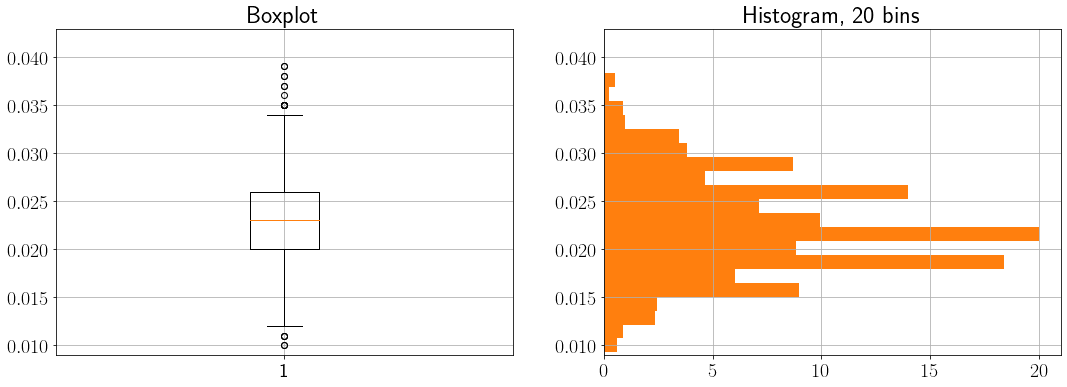

In [10]:
# plotting
plt.figure()

plt.subplot(121)
plt.boxplot( ber );
plt.title('Boxplot')
plt.ylim( ( 0.9 * np.min( ber ), 1.1 * np.max( ber ) ) )
plt.grid( True )



plt.subplot(122)

# histograms on x- and y-axis
bins = 20

ber_hist = np.histogram( ber, bins = bins, density = 1 )
width = ( np.max( ber ) - np.min( ber ) ) / bins

plt.barh( ber_hist[1][:-1] , ber_hist[0] / np.max( ber_hist[0]) * 20, width, color = '#ff7f0e' )   

plt.title('Histogram, {} bins'.format( bins ))
plt.grid( True )
plt.ylim( ( 0.9 * np.min( ber ), 1.1 * np.max( ber ) ) )


plt.savefig('boxplot_histogram.pdf')